In [1]:
import re
import os
import sys
import glob
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.7.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8
squidpy==1.2.3


In [3]:
adata1 = sq.read.visium('JY97A/outs/')
adata2 = sq.read.visium('JY98A/outs/')
adata3 = sq.read.visium('JY101A/outs/')
adata4 = sq.read.visium('JY102A/outs/')
adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()
adata4.var_names_make_unique()
print(adata1)
print(adata2)
print(adata3)
print(adata4)

/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 320 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 741 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 397 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 846 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [4]:
[k for d in [adata1.uns['spatial'],adata2.uns['spatial'],adata3.uns['spatial'],adata4.uns['spatial']] for k,v in d.items()]

['JY97A', 'JY98A', 'JY101A', 'JY102A']

In [5]:
adata = sc.concat([adata1,adata2,adata3,adata4], label='library_id', uns_merge='unique', 
                  keys = [k for d in [adata1.uns['spatial'],adata2.uns['spatial'],adata3.uns['spatial'],adata4.uns['spatial']] for k,v in d.items()],
                  index_unique='-')
adata

AnnData object with n_obs × n_vars = 2304 × 32623
    obs: 'in_tissue', 'array_row', 'array_col', 'library_id'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata.obs

in_tissue  array_row  array_col library_id
AAACCGGGTAGGTACC-1-JY97A           1         42         28      JY97A
AAATCGTGTACCACAA-1-JY97A           1         44         56      JY97A
AAATGGTCAATGTGCC-1-JY97A           1         33         51      JY97A
AAATTAACGGGTAGCT-1-JY97A           1         34         58      JY97A
AACTCAAGTTAATTGC-1-JY97A           1         38         44      JY97A
...                              ...        ...        ...        ...
TTGTGGTAGGAGGGAT-1-JY102A          1         50         28     JY102A
TTGTTAGCAAATTCGA-1-JY102A          1         22         42     JY102A
TTGTTCAGTGTGCTAC-1-JY102A          1         24         64     JY102A
TTGTTTCCATACAACT-1-JY102A          1         45         27     JY102A
TTGTTTGTGTAAATTC-1-JY102A          1          7         51     JY102A

[2304 rows x 4 columns]

In [7]:
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
adata

AnnData object with n_obs × n_vars = 2304 × 32623
    obs: 'in_tissue', 'array_row', 'array_col', 'library_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/opt/python/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_genes_by_counts'>

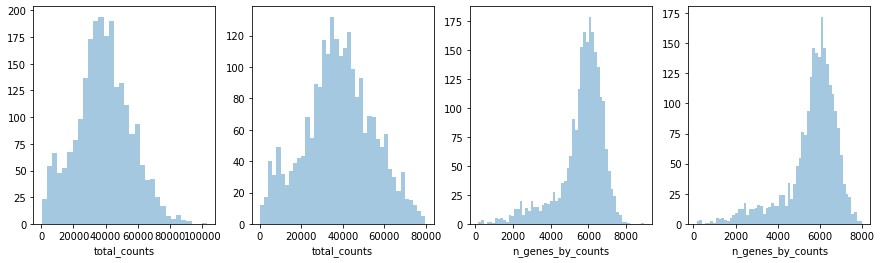

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 80000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 8000], kde=False, bins=60, ax=axs[3])

/opt/python/3.8/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


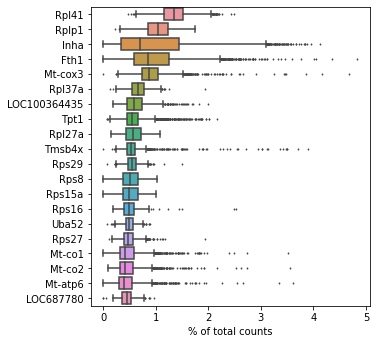

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)

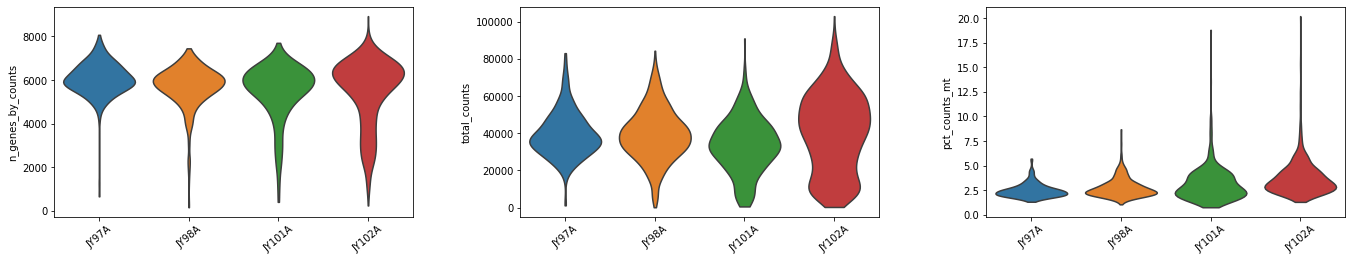

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby='library_id',
             stripplot=False, multi_panel=True, rotation=40)

In [11]:
sc.pp.filter_cells(adata, min_genes=2000)
sc.pp.filter_cells(adata, max_genes=8000)
adata = adata[adata.obs["pct_counts_mt"] < 10]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=2)
print(adata.var.shape)

#cells after MT filter: 2256
(16952, 8)


/opt/python/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


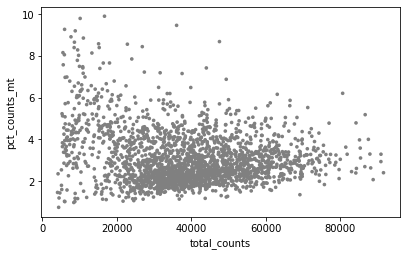

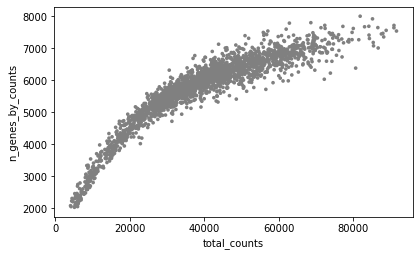

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

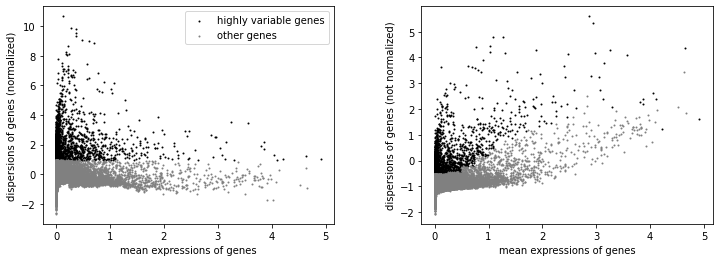

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

/opt/python/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


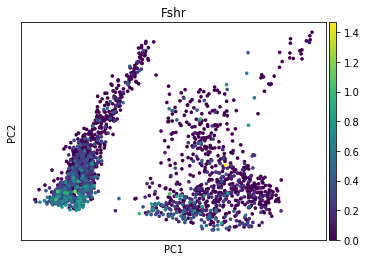

In [15]:
sc.pp.scale(adata, max_value=8)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata,color='Fshr')

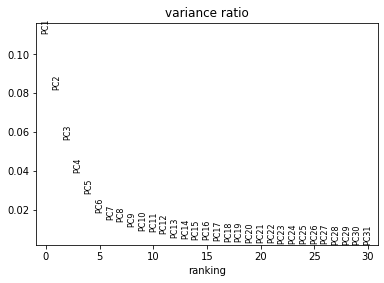

In [16]:
sc.pl.pca_variance_ratio(adata, log=False)

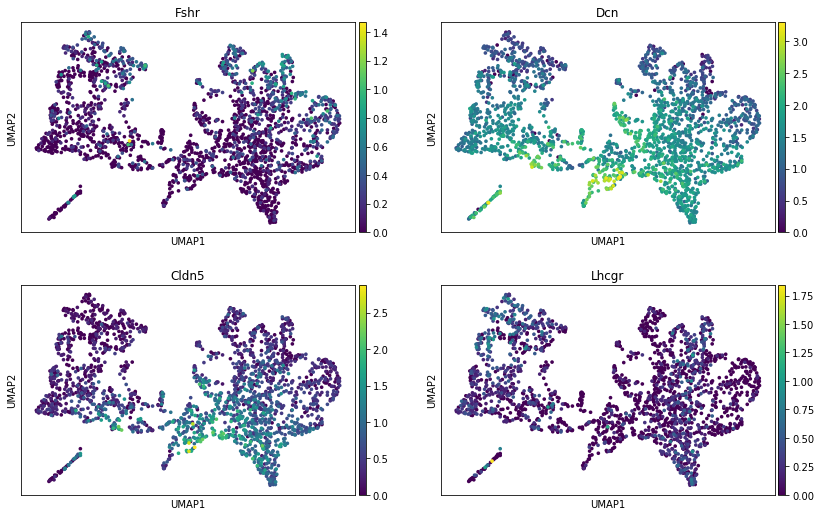

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata,color=['Fshr','Dcn','Cldn5','Lhcgr'],ncols=2)

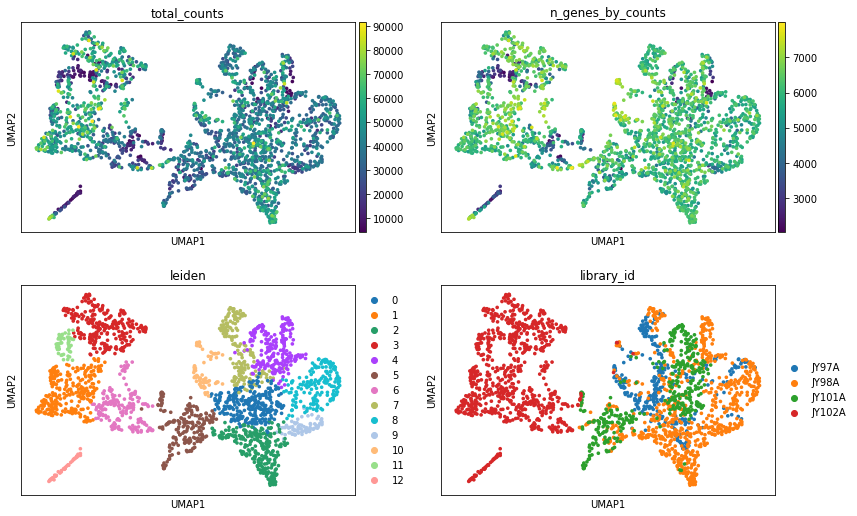

In [18]:
sc.tl.leiden(adata,resolution=.45)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden","library_id"], ncols=2)

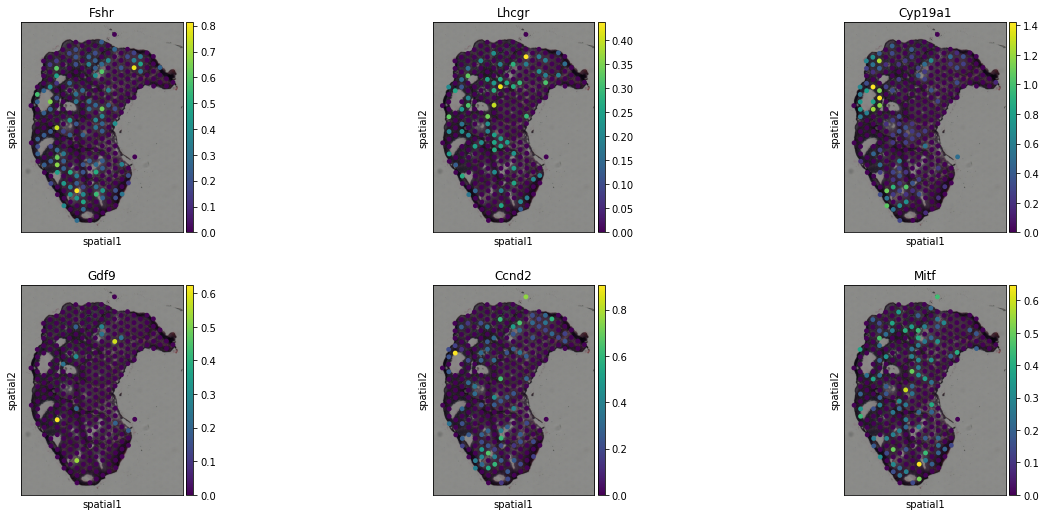

In [19]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY97A',:].copy(), color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY97A',ncols=3)

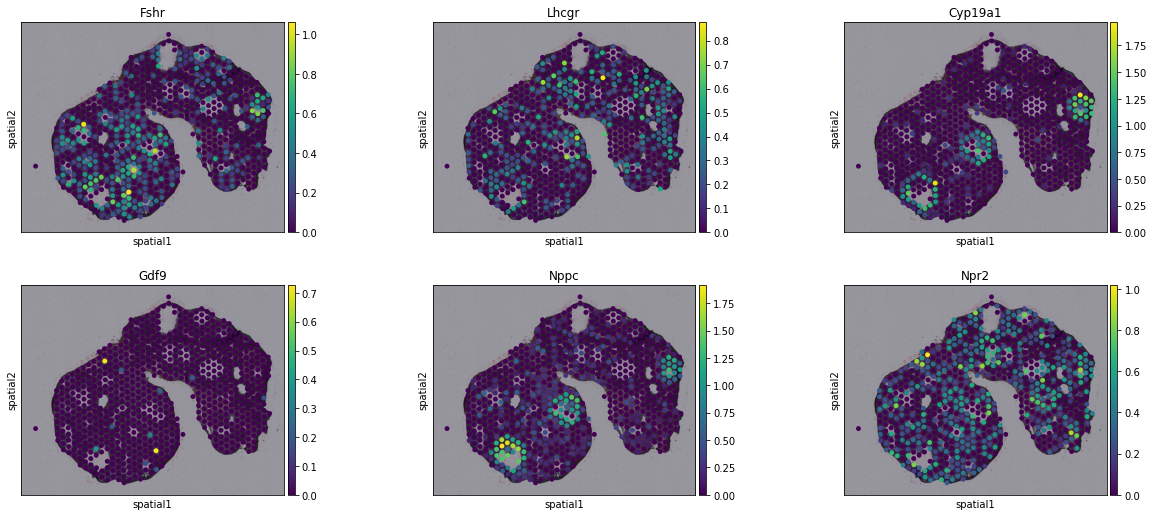

In [20]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY98A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Nppc','Npr2'], library_id='JY98A',ncols=3,size=1.2)

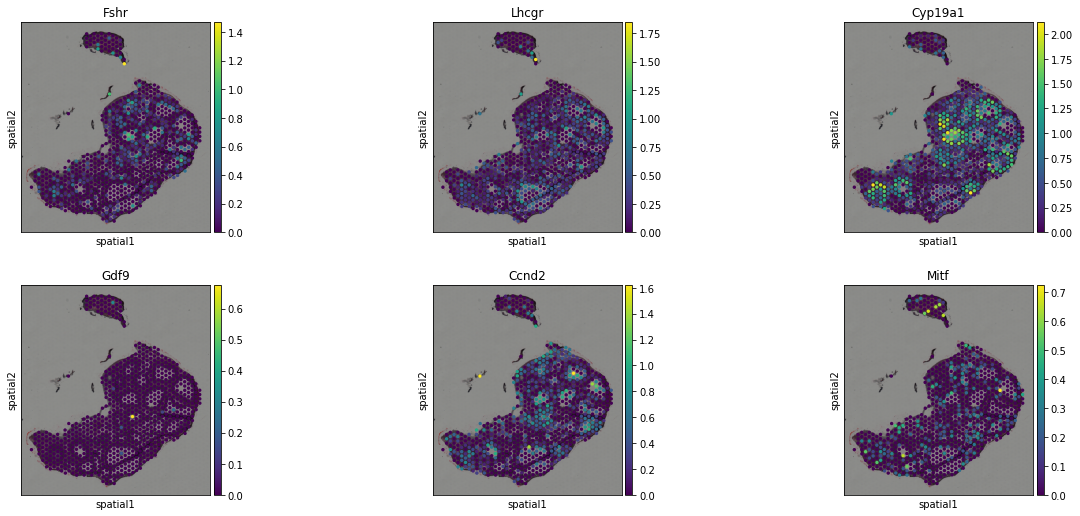

In [21]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY102A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY102A',ncols=3,size=1.2)

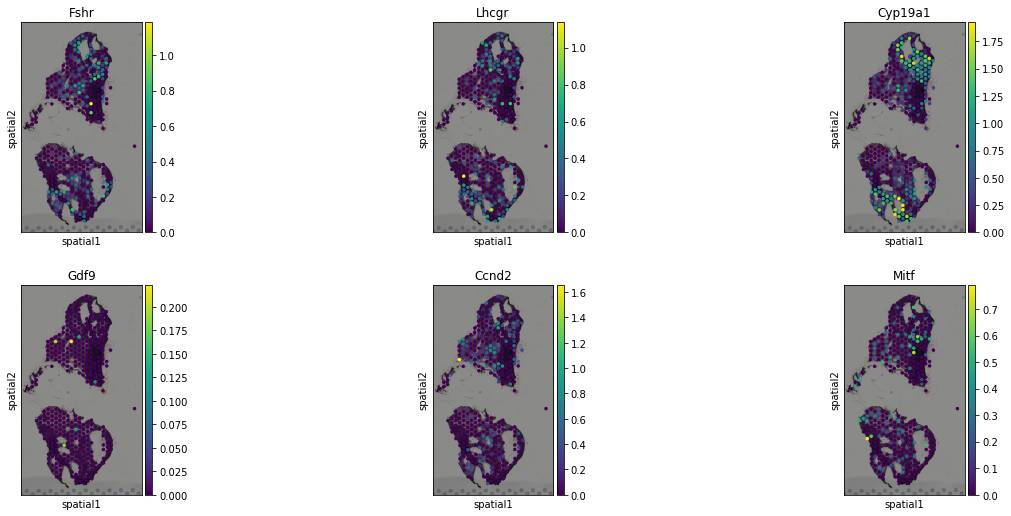

In [22]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY101A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY101A',ncols=3,size=1.2)

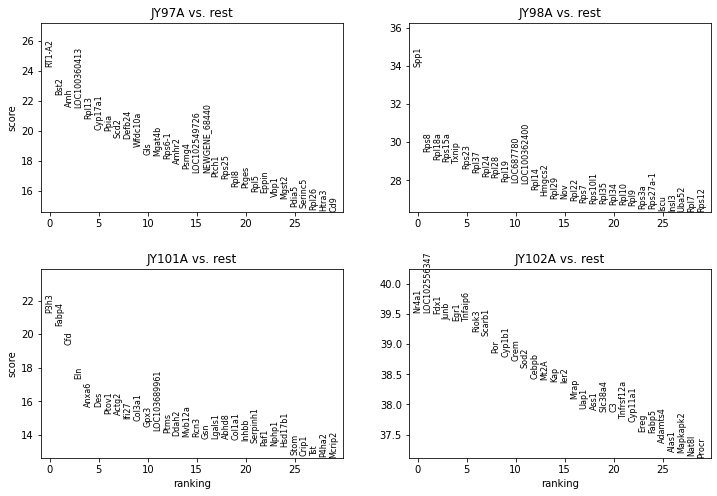

In [23]:
sc.tl.rank_genes_groups(adata,'library_id',method='wilcoxon',key_added='library')
sc.pl.rank_genes_groups(adata, key='library',n_genes=30, sharey=False, ncols=2)

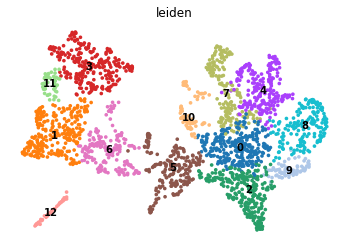

In [24]:
sc.pl.umap(adata, color="leiden", frameon=False, legend_loc='on data')

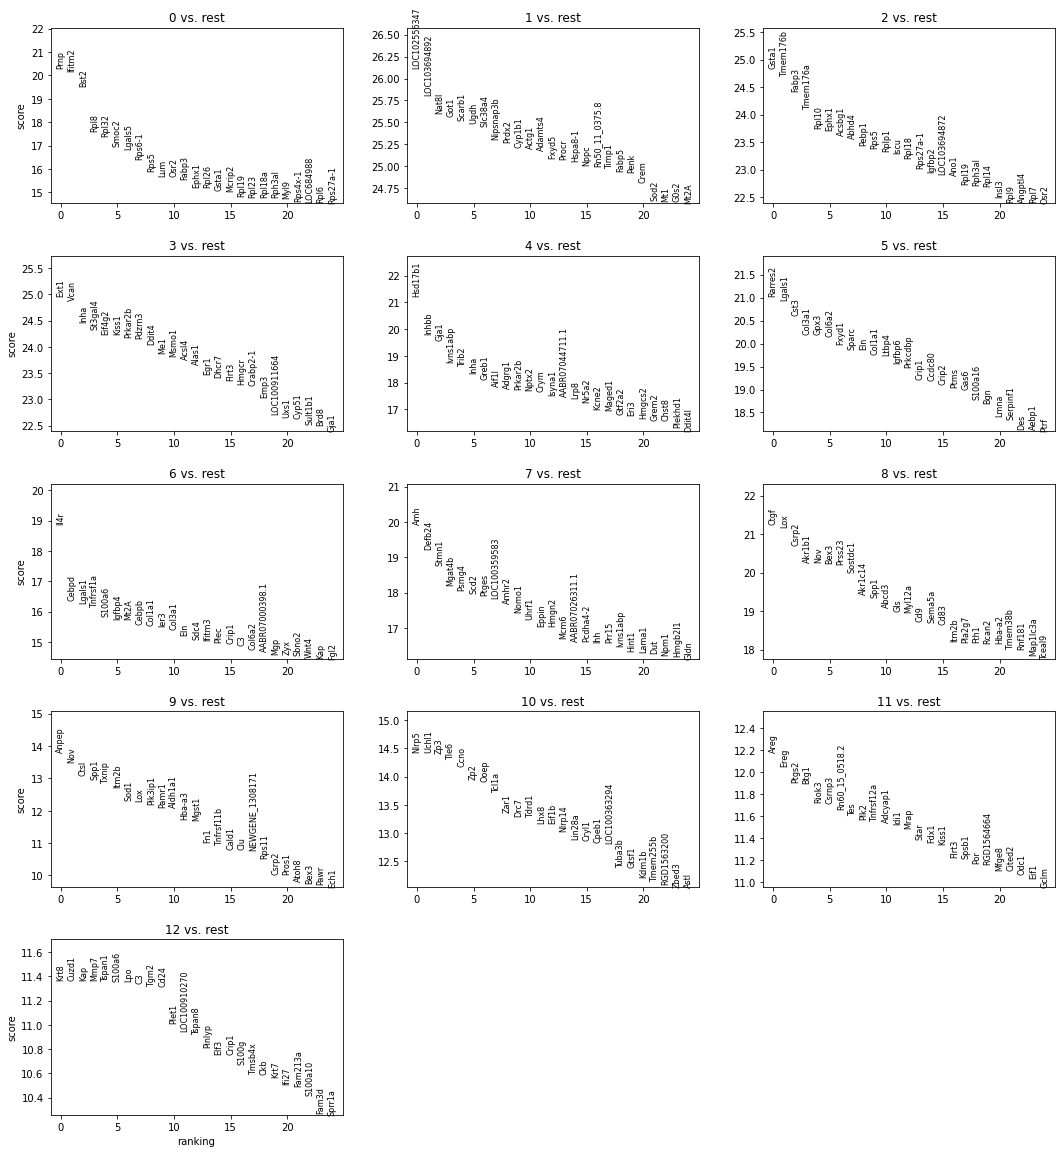

In [25]:
sc.tl.rank_genes_groups(adata,'leiden',method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols=3)

In [26]:
array = []
for i in range(13):
    index = list(map(lambda x: x[i],adata.uns['rank_genes_groups']['names']))
    score = pd.Series(map(lambda x: x[i],adata.uns['rank_genes_groups']['scores']),index=index,name='scores')
    logfc = pd.Series(map(lambda x: x[i],adata.uns['rank_genes_groups']['logfoldchanges']),index=index,name='logFC')
    pv = pd.Series(map(lambda x: x[i],adata.uns['rank_genes_groups']['pvals_adj']),index=index,name='pvals_adj')
    markers1 = pd.concat([score,logfc,pv],join='inner',axis=1)
    markers1 = markers1[markers1['logFC']>0.8].head(n=200)
    markers1['cluster'] = [i] * markers1.shape[0]
    array.append(markers1)
markers = pd.concat(array,join='inner',axis=0)
markers.to_csv('squidpy.marker.genes.csv')

In [26]:
adata.write('squidpy.h5ad')

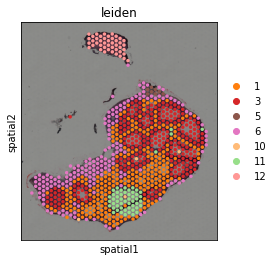

In [27]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY102A',:].copy(), 
              color='leiden', library_id='JY102A',ncols=2,size=1.2)

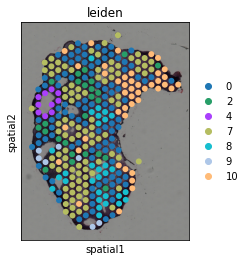

In [28]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY97A',:].copy(), 
              color='leiden', library_id='JY97A',ncols=2,size=1.2)

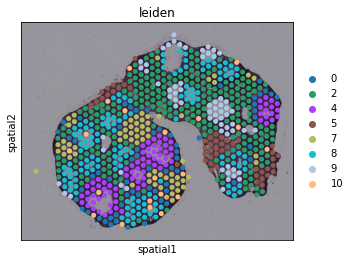

In [29]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY98A',:].copy(), 
              color='leiden', library_id='JY98A',ncols=2,size=1.2)

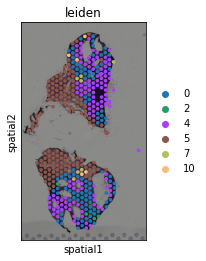

In [30]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY101A',:].copy(), 
              color='leiden', library_id='JY101A',ncols=2,size=1.2)

In [3]:
adata = sc.read_h5ad('squidpy.h5ad')
adata.obs

in_tissue  array_row  array_col library_id  \
AAACCGGGTAGGTACC-1-JY97A           1         42         28      JY97A   
AAATCGTGTACCACAA-1-JY97A           1         44         56      JY97A   
AAATGGTCAATGTGCC-1-JY97A           1         33         51      JY97A   
AAATTAACGGGTAGCT-1-JY97A           1         34         58      JY97A   
AACTCAAGTTAATTGC-1-JY97A           1         38         44      JY97A   
...                              ...        ...        ...        ...   
TTGTGGTAGGAGGGAT-1-JY102A          1         50         28     JY102A   
TTGTTAGCAAATTCGA-1-JY102A          1         22         42     JY102A   
TTGTTCAGTGTGCTAC-1-JY102A          1         24         64     JY102A   
TTGTTTCCATACAACT-1-JY102A          1         45         27     JY102A   
TTGTTTGTGTAAATTC-1-JY102A          1          7         51     JY102A   

                           n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCGGGTAGGTACC-1-JY97A                7082                 8.865453   
AAATCGTGTACCACAA-1-JY97A                7666                 8.944681   
AAATGGTCAATGTGCC-1-JY97A                5917                 8.685754   
AAATTAACGGGTAGCT-1-JY97A                7388                 8.907748   
AACTCAAGTTAATTGC-1-JY97A                5931                 8.688117   
...                                      ...                      ...   
TTGTGGTAGGAGGGAT-1-JY102A               5270                 8.569975   
TTGTTAGCAAATTCGA-1-JY102A               6877                 8.836083   
TTGTTCAGTGTGCTAC-1-JY102A               6549                 8.787220   
TTGTTTCCATACAACT-1-JY102A               6322                 8.751949   
TTGTTTGTGTAAATTC-1-JY102A               4547                 8.422443   

                           total_counts  log1p_total_counts  \
AAACCGGGTAGGTACC-1-JY97A        64778.0           11.078736   
AAATCGTGTACCACAA-1-JY97A        83060.0           11.327331   
AAATGGTCAATGTGCC-1-JY97A        31123.0           10.345735   
AAATTAACGGGTAGCT-1-JY97A        50959.0           10.838797   
AACTCAAGTTAATTGC-1-JY97A        36247.0           10.498139   
...                                 ...                 ...   
TTGTGGTAGGAGGGAT-1-JY102A       23864.0           10.080168   
TTGTTAGCAAATTCGA-1-JY102A       65831.0           11.094861   
TTGTTCAGTGTGCTAC-1-JY102A       49334.0           10.806389   
TTGTTTCCATACAACT-1-JY102A       47794.0           10.774676   
TTGTTTGTGTAAATTC-1-JY102A       20944.0            9.949656   

                           pct_counts_in_top_50_genes  \
AAACCGGGTAGGTACC-1-JY97A                    24.326160   
AAATCGTGTACCACAA-1-JY97A                    26.219600   
AAATGGTCAATGTGCC-1-JY97A                    24.547762   
AAATTAACGGGTAGCT-1-JY97A                    20.402677   
AACTCAAGTTAATTGC-1-JY97A                    21.027947   
...                                               ...   
TTGTGGTAGGAGGGAT-1-JY102A                   22.871271   
TTGTTAGCAAATTCGA-1-JY102A                   23.993255   
TTGTTCAGTGTGCTAC-1-JY102A                   21.352414   
TTGTTTCCATACAACT-1-JY102A                   21.772607   
TTGTTTGTGTAAATTC-1-JY102A                   24.603705   

                           pct_counts_in_top_100_genes  \
AAACCGGGTAGGTACC-1-JY97A                     35.348421   
AAATCGTGTACCACAA-1-JY97A                     37.716109   
AAATGGTCAATGTGCC-1-JY97A                     35.709925   
AAATTAACGGGTAGCT-1-JY97A                     30.145803   
AACTCAAGTTAATTGC-1-JY97A                     31.980578   
...                                                ...   
TTGTGGTAGGAGGGAT-1-JY102A                    32.919879   
TTGTTAGCAAATTCGA-1-JY102A                    33.926266   
TTGTTCAGTGTGCTAC-1-JY102A                    30.944176   
TTGTTTCCATACAACT-1-JY102A                    31.056200   
TTGTTTGTGTAAATTC-1-JY102A                    35.174752   

                           pct_counts_in_top_200_genes  \
AAACCGGGTAGGTACC-1-JY97A                     45.296243   
AAATCGTGTACCACAA-1

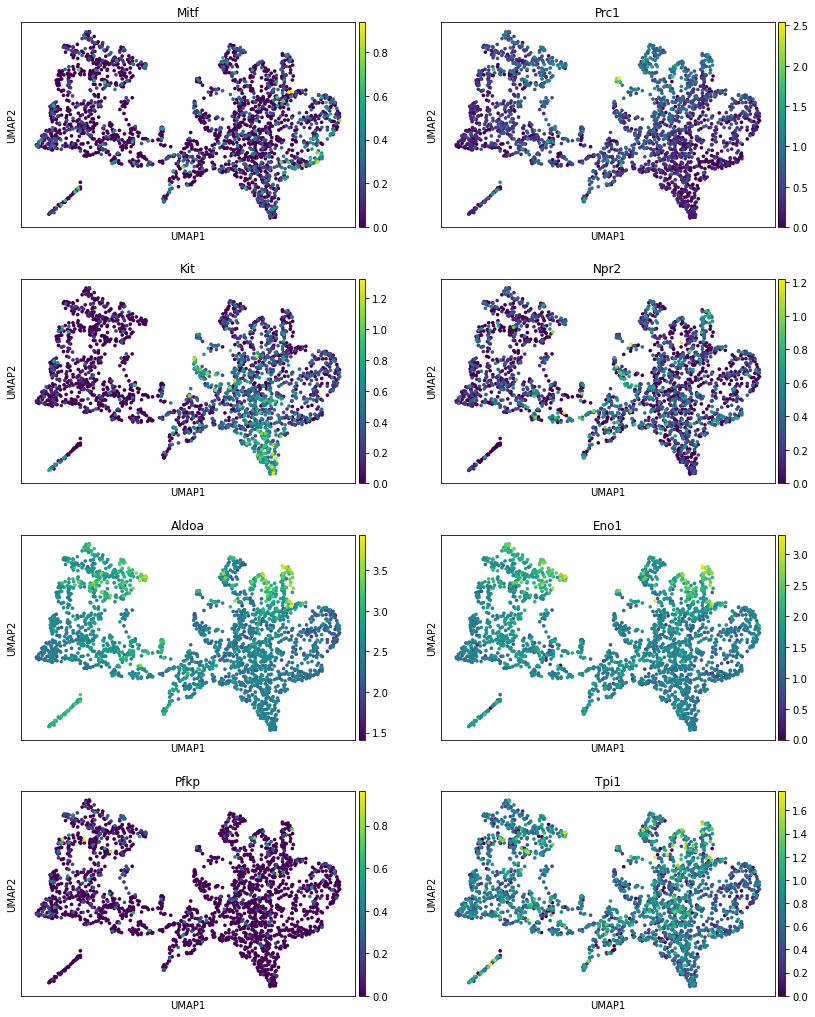

In [6]:
sc.pl.umap(adata,color=['Mitf','Prc1','Kit','Npr2','Aldoa','Eno1','Pfkp','Tpi1'],ncols=2)

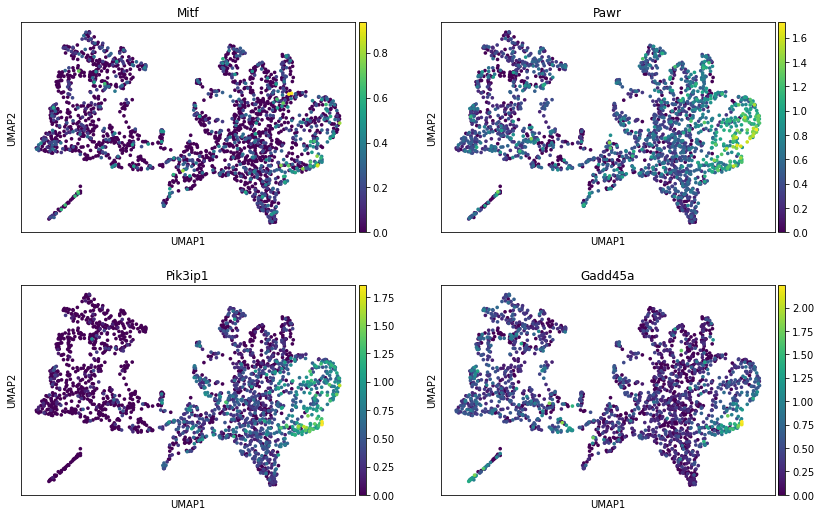

In [9]:
sc.pl.umap(adata,color=['Mitf','Pawr','Pik3ip1','Gadd45a'],ncols=2)

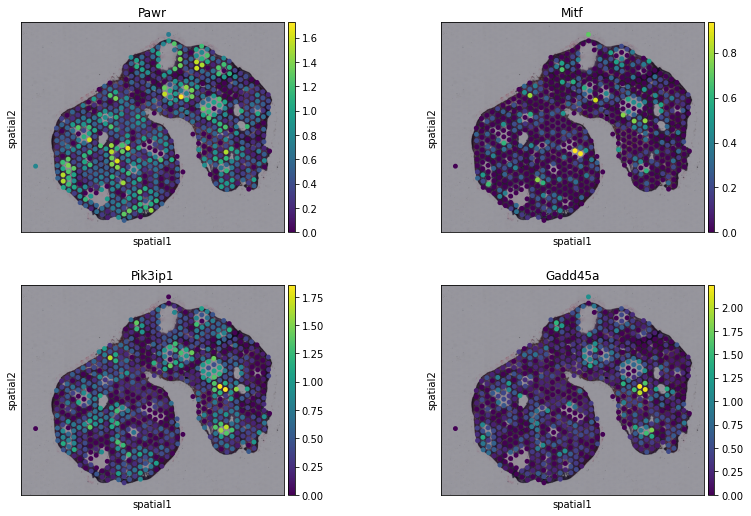

In [10]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY98A',:].copy(), 
              color=['Pawr','Mitf','Pik3ip1','Gadd45a'], library_id='JY98A',ncols=2,size=1.2)